# Análise de Dados com Python
Analisando o histórico de suicídios no Brasil, ocorridos de 2014 a 2018.

**Nosso roteiro:**

1. Configuração do ambiente virtual
2. Carregamento dos dados
3. Exploração inicial
4. Limpeza e preparação
5. Análise e visualização

# Passo 1: Configuração do ambiente

In [1]:
# Instalação das bibliotecas
# - pandas: para manipulação e análise de dados em formato de tabela
# - matplotlib: para criação de gráficos
# - seaborn: biblioteca de gráficos baseada na matplotlib

!pip install -q pandas matplotlib seaborn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Usamos apelidos (como 'pd' para pandas) para facilitar o uso das bibliotecas
# e evitar conflitos de nomes.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="whitegrid")
print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


# Passo 2: Carregamento dos Dados

In [25]:
df = pd.read_csv("datasus_suicidio_2014_2018.csv", sep= ',', encoding='latin1')
print ("Dados carregados com sucesso!")

Dados carregados com sucesso!


# Passo 3: Exploração Inicial (Análise Exploratória de Dados - EDA)

Queremos entender:
* Qual é o formato? (linhas e colunas)
* Quais são as colunas disponíveis?
* Que tipo de dado cada coluna armazena? (texto, número, data)
* Existem dados faltando?
* Quais as estatísticas básicas dos dados numéricos e categóricos?

In [26]:
# O método .head() mostra as primeiras linhas do DataFrame
df.head(3)

,estado,ano,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O,idade,mes
0,AC,2014,Suicídio,02-01-14,02-07-77,Masculino,Preta,Casado,4 a 7 anos,ATLETA PROFISSIONAL DE FUTEBOL,Rio Branco,Domicílio,Não,X700,X700,37.0,1
1,AC,2014,Suicídio,23-01-14,30-07-66,Masculino,Branca,União consensual,12 e mais,MEDICO GINECOLOGISTA E OBSTETRA,Rio Branco,Domicílio,Não,X800,X800,48.0,1
2,AC,2014,Suicídio,31-01-14,28-07-43,Masculino,Branca,NaN,NaN,0,Rio Branco,Domicílio,Não,X700,X700,71.0,1


In [27]:
print("Dimensões do DataFrame (linhas e colunas)")
print(df.shape)

# O método .info() é um jeito rápido de ver informações gerais sobre o DataFrame:
print("\n" + "="*50 + "\n")
print("Informações Gerais e Tipos de Dados:")
df.info()

Dimensões do DataFrame (linhas e colunas)
(58634, 17)


Informações Gerais e Tipos de Dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estado      58634 non-null  object 
 1   ano         58634 non-null  int64  
 2   CIRCOBITO   56606 non-null  object 
 3   DTOBITO     58634 non-null  object 
 4   DTNASC      58407 non-null  object 
 5   SEXO        58619 non-null  object 
 6   RACACOR     57298 non-null  object 
 7   ESTCIV      54305 non-null  object 
 8   ESC         45162 non-null  object 
 9   OCUP        58634 non-null  object 
 10  CODMUNRES   58634 non-null  object 
 11  LOCOCOR     58463 non-null  object 
 12  ASSISTMED   40872 non-null  object 
 13  CAUSABAS    58634 non-null  object 
 14  CAUSABAS_O  58544 non-null  object 
 15  idade       58407 non-null  float64
 16  mes         58634 non-null  int64  
dtypes: float64(1),

In [28]:
print("Contagem de valores ausentes por coluna:")
df.isnull().sum()

Contagem de valores ausentes por coluna:


estado            0
ano               0
CIRCOBITO      2028
DTOBITO           0
DTNASC          227
SEXO             15
RACACOR        1336
ESTCIV         4329
ESC           13472
OCUP              0
CODMUNRES         0
LOCOCOR         171
ASSISTMED     17762
CAUSABAS          0
CAUSABAS_O       90
idade           227
mes               0
dtype: int64

In [29]:
print("Estatísticas descritivas dos dados numéricos:")
df.describe()

Estatísticas descritivas dos dados numéricos:


,ano,idade,mes
count,58634.000000,58407.000000,58634.000000
mean,2016.093325,42.543308,6.585496
std,1.412665,17.378526,3.502479
min,2014.000000,0.000000,1.000000
25%,2015.000000,29.000000,3.000000
50%,2016.000000,40.000000,7.000000
75%,2017.000000,54.000000,10.000000
max,2018.000000,113.000000,12.000000


In [30]:
print("Estatísticas descritivas dos dados categóricos:")
df.describe(include='object')

Estatísticas descritivas dos dados categóricos:


,estado,CIRCOBITO,DTOBITO,DTNASC,SEXO,RACACOR,ESTCIV,ESC,OCUP,CODMUNRES,LOCOCOR,ASSISTMED,CAUSABAS,CAUSABAS_O
count,58634,56606,58634,58407,58619,57298,54305,45162,58634,58634,58463,40872,58634,58544
unique,27,4,1826,22200,2,5,5,5,1108,4769,6,2,301,527
top,SP,Suicídio,01-01-17,15-06-81,Masculino,Branca,Solteiro,8 a 11 anos,0,São Paulo,Domicílio,Não,X700,X700
freq,11256,55484,64,12,46169,29193,29408,14503,12353,2090,36070,32629,28997,26666


# Passo 4: Limpeza e Preparação dos Dados

In [31]:
# Verifica a contagem de valores únicos na coluna 'ESTCIV'

print("Contagem de valores únicos na coluna 'ESTCIV': ")

df['ESTCIV'].value_counts()

#df['ESTCIV'].unique()

Contagem de valores únicos na coluna 'ESTCIV': 


ESTCIV
Solteiro                  29408
Casado                    15435
Separado judicialmente     4146
União consensual           3144
Viúvo                      2172
Name: count, dtype: int64

In [32]:
#Substituindo valores ausentes na coluna 'ESTCIV' por 'Não informado'

df['ESTCIV'].fillna('Não informado', inplace= True)
df['ESTCIV'].value_counts()

ESTCIV
Solteiro                  29408
Casado                    15435
Não informado              4329
Separado judicialmente     4146
União consensual           3144
Viúvo                      2172
Name: count, dtype: int64

In [33]:
#Substituindo valores ausentes na coluna 'SEXO' por 'Não informado'

df['SEXO'].fillna('Não informado', inplace= True)
df['SEXO'].value_counts()

SEXO
Masculino        46169
Feminino         12450
Não informado       15
Name: count, dtype: int64

In [34]:
#Substituindo valores ausentes na coluna 'ESC' por 'Não informado'

df['ESC'].fillna('Não informado', inplace= True)
df['ESC'].value_counts()

ESC
8 a 11 anos      14503
4 a 7 anos       14454
Não informado    13472
1 a 3 anos        8042
12 e mais         5501
Nenhuma           2662
Name: count, dtype: int64

In [35]:
#Transformando coluna 'DTOBITO' em datatime

df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d-%m-%y', errors='coerce')


In [36]:
#Transformando coluna 'DTNASC' em datatime

df['DTNASC'] = pd.to_datetime(df['DTNASC'], format='%d-%m-%y', errors='coerce')

In [37]:
print("Tipos de dados após o tratamento:")
df.info()

Tipos de dados após o tratamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58634 entries, 0 to 58633
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   estado      58634 non-null  object        
 1   ano         58634 non-null  int64         
 2   CIRCOBITO   56606 non-null  object        
 3   DTOBITO     58634 non-null  datetime64[ns]
 4   DTNASC      58407 non-null  datetime64[ns]
 5   SEXO        58634 non-null  object        
 6   RACACOR     57298 non-null  object        
 7   ESTCIV      58634 non-null  object        
 8   ESC         58634 non-null  object        
 9   OCUP        58634 non-null  object        
 10  CODMUNRES   58634 non-null  object        
 11  LOCOCOR     58463 non-null  object        
 12  ASSISTMED   40872 non-null  object        
 13  CAUSABAS    58634 non-null  object        
 14  CAUSABAS_O  58544 non-null  object        
 15  idade       58407 non-null  float64 

# Passo 5: Análise e Visualização de Dados

Com os dados limpos e preparados, vamos explorar as distribuições de algumas variáveis importantes.

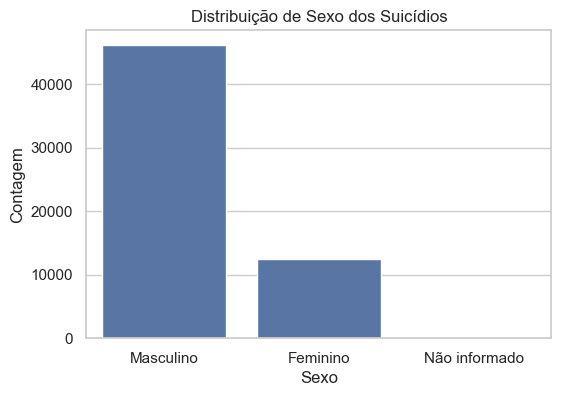

In [45]:
#gráfico de contagem de valores do atributo SEXO.

#definir o tamanho da figura
plt.figure(figsize=(6,4))

#criar o gráfico de contagem
sns.countplot(data=df, x='SEXO', order=df['SEXO'].value_counts().index)

#Adiciona um título
plt.title("Distribuição de Sexo dos Suicídios")
plt.xlabel("Sexo")
plt.ylabel("Contagem")

plt.show()

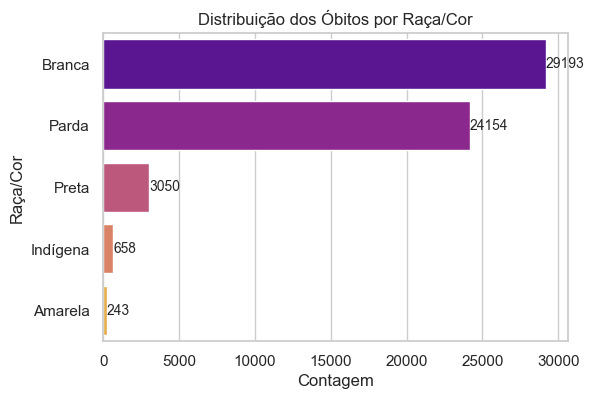

In [48]:
#gráfico de contagem de valores do atributo Raça/cor.

#definir o tamanho da figura
plt.figure(figsize=(6,4))

#criar o gráfico de contagem
sns.countplot(data=df, y='RACACOR', order=df['RACACOR'].value_counts().index, palette='plasma')
for label in df ['RACACOR'].value_counts().index:
    count = df['RACACOR'].value_counts()[label]
    plt.text(count+0.5, label, str(count), va='center', fontsize=10)

#Adiciona um título
plt.title("Distribuição dos Óbitos por Raça/Cor")
plt.xlabel("Contagem")
plt.ylabel("Raça/Cor")

plt.show()

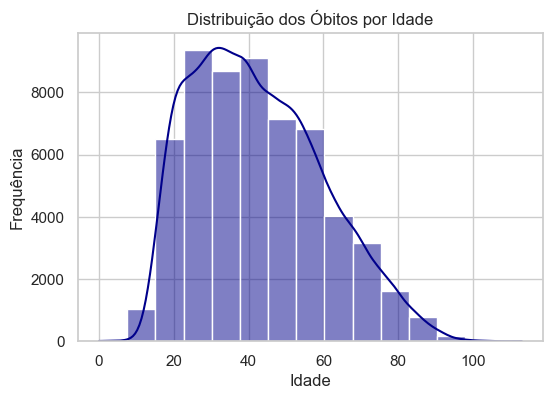

In [50]:
#gráfico de contagem de valores do atributo Idade.

#definir o tamanho da figura
plt.figure(figsize=(6,4))

#criar o gráfico de contagem
sns.histplot(data=df, x='idade',bins=15, kde=True, color='darkblue')

#Adiciona um título
plt.title("Distribuição dos Óbitos por Idade")
plt.xlabel("Idade")
plt.ylabel("Frequência")

plt.show()

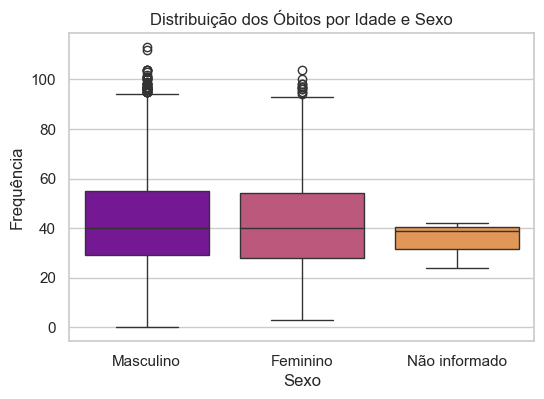

In [54]:
#gráfico de contagem de valores do atributo Idade e Sexo.

#definir o tamanho da figura
plt.figure(figsize=(6,4))

#criar o gráfico de contagem
sns.boxplot(data=df, x='SEXO',y='idade',palette='plasma')

#Adiciona um título
plt.title("Distribuição dos Óbitos por Idade e Sexo")
plt.xlabel("Sexo")
plt.ylabel("Frequência")

plt.show()